1)Загрузите датасет digits с помощью функции load_digits из sklearn.datasets и подготовьте матрицу признаков X и ответы на обучающей выборке y.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
digits = datasets.load_digits()
X = digits.data
y = digits.target
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

2)Для оценки качества далее нужно будет использовать cross_val_score из sklearn.cross_validation с параметром cv=10. Эта функция реализует k-fold cross validation c k равным значению параметра cv. Используйте k=10, чтобы полученные оценки качества имели небольшой разброс. Функция cross_val_score будет возвращать numpy.ndarray, в котором будет k чисел - качество в каждом из k экспериментов k-fold cross validation. Получите среднее значение (которое и будет оценкой качества работы) массива, который возвращает cross_val_score.

In [3]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
cv_score = model_selection.cross_val_score(model, X, y, cv=10)
print(cv_score.shape)
print(np.mean(cv_score))

(10,)
0.8274612042209807


3)Воспользуйтесь BaggingClassifier из sklearn.ensemble, чтобы обучить бэггинг над DecisionTreeClassifier. Используйте в BaggingClassifier параметры по умолчанию, задав только количество деревьев равным 100. Качество классификации новой модели - среднее значение cross_val_score . Сравните работу композиции деревьев с одним решающем деревом.

In [5]:
from sklearn.ensemble import BaggingClassifier
bag_model = BaggingClassifier(model, n_estimators=100)
cv_score_bag = model_selection.cross_val_score(bag_model, X, y, cv=10)
print(cv_score_bag.shape)
print(np.mean(cv_score_bag))

(10,)
0.9242675356921168


4)Теперь изучите параметры BaggingClassifier и выберите их такими, чтобы каждый базовый алгоритм обучался не на всех d признаках, а на корень из d случайных признаков. Каково качество работы алгоритма?

In [9]:
bag_model1 = BaggingClassifier(model, n_estimators=100, max_features=int(np.sqrt(X.shape[1])))
cv_score_bag1 = model_selection.cross_val_score(bag_model1, X, y, cv=10)
print(cv_score_bag1.shape)
print(np.mean(cv_score_bag1))

(10,)
0.9337616387337058


5)Наконец, давайте попробуем выбирать случайные признаки не один раз на все дерево, а при построении каждой вершины дерева. Сделать это несложно: нужно убрать выбор случайного подмножества признаков в BaggingClassifier и добавить его в DecisionTreeClassifier. Какой параметр за это отвечает, можно понять из документации sklearn. Попробуйте выбирать опять же корень из d случайных признаков. Какое теперь качество полученного классификатора?

In [10]:
tree_model = DecisionTreeClassifier(splitter='random', max_features=int(np.sqrt(X.shape[1])))
bag_model2 = BaggingClassifier(tree_model, n_estimators=100, bootstrap=False, max_features=int(np.sqrt(X.shape[1])))
cv_score_bag2 = model_selection.cross_val_score(bag_model2, X, y, cv=10)
cv_score_tree = model_selection.cross_val_score(tree_model, X, y, cv=10)
print(np.mean(cv_score_bag2))
print(np.mean(cv_score_tree))

0.9271166977032899
0.7367877094972067


6)Полученный в пункте 4 классификатор - бэггинг на рандомизированных деревьях (в которых при построении каждой вершины выбирается случайное подмножество признаков и разбиение ищется только по ним). Это в точности соответствует алгоритму Random Forest. Сравнить качество работы классификатора с RandomForestClassifier из sklearn.ensemble.


In [11]:
from sklearn.ensemble import RandomForestClassifier
model_rfc = RandomForestClassifier()
cv_score_rfc = model_selection.cross_val_score(model_rfc, X, y, cv=10)
print(np.mean(cv_score_rfc))

0.9549068901303537


Изучите, как качество классификации на данном датасете зависит от количества деревьев, количества признаков, выбираемых при построении каждой вершины дерева, а также ограничений на глубину дерева. Для наглядности лучше построить графики зависимости качества от значений параметров, но для сдачи задания это делать не обязательно.

In [12]:
num_trees = np.arange(1, 200, 10)
num_features = np.arange(1, X.shape[1]+1, 1)
depths = np.arange(1, 100, 5)

In [14]:
a = []
nn = 0
for i in num_trees:
    nn += 1
    print(nn)
    temp_tree = DecisionTreeClassifier(splitter='best')
    temp_model = BaggingClassifier(temp_tree, n_estimators=i)
    temp_score = model_selection.cross_val_score(temp_model, X, y, cv=10)
    a.append(np.mean(temp_score))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


Text(0, 0.5, 'Score')

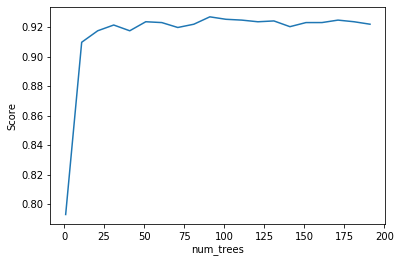

In [15]:
plt.plot(num_trees, a)
plt.xlabel("num_trees")
plt.ylabel("Score")

In [17]:
nn = 0
for i in num_features:
    nn += 1
    print(nn)
    temp_tree = DecisionTreeClassifier(splitter='best', max_features=i)
    temp_model = BaggingClassifier(temp_tree, max_features=i)
    temp_score = model_selection.cross_val_score(temp_model, X, y, cv=10)
    a.append(np.mean(temp_score))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64


Text(0, 0.5, 'Score')

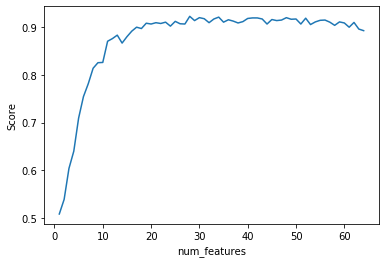

In [18]:
plt.plot(num_features, a[num_trees.shape[0]:])
plt.xlabel("num_features")
plt.ylabel("Score")

In [19]:
nn = 0
b = []
for i in depths:
    nn += 1
    print(nn)
    temp_tree = DecisionTreeClassifier(splitter='best', max_depth=i)
    temp_model = BaggingClassifier(temp_tree)
    temp_score = model_selection.cross_val_score(temp_model, X, y, cv=10)
    b.append(np.mean(temp_score))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


Text(0, 0.5, 'Score')

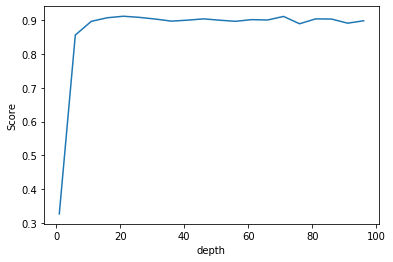

In [20]:
plt.plot(depths, b)
plt.xlabel("depth")
plt.ylabel("Score")